In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


def plot_comparison():
    # Lo    ad the CSV files
    df_PI = pd.read_csv("results/PI_run_data.csv")
    df_MPC = pd.read_csv("results/MPC_run_data.csv")
    # df_RL = pd.read_csv("results/RL_run_data.csv")

    # Define styles for each controller
    styles = {"PI": "-", "MPC": "--", "RL": ":"}

    # Map DataFrames to controllers
    controllers = {"PI": df_PI, "MPC": df_MPC, "RL": df_MPC}

    # --- Plot Tinlet & Toutlet ---
    plt.figure(figsize=(10, 6))

    for name, df in controllers.items():
        plt.plot(
            df["time_min"],
            df["Tinlet"],
            linestyle=styles[name],
            color="C0",
            label=f"Tinlet {name}",
        )
        plt.plot(
            df["time_min"],
            df["Toutlet"],
            linestyle=styles[name],
            color="C1",
            label=f"Toutlet {name}",
        )

    plt.axhline(95, color="red", linestyle="--", label="95°C limit")
    plt.axhline(
        85, color="green", linestyle=":", label="Setpoint"
    )  # adjust Tset if needed

    plt.xlabel("Time [min]")
    plt.ylabel("Temperature (°C)")
    plt.title("Tinlet & Toutlet Comparison")
    plt.grid(True)

    # Custom legend: colors for signals, line styles for controllers
    signal_lines = [
        Line2D([0], [0], color="C0", lw=2, label="Tinlet"),
        Line2D([0], [0], color="C1", lw=2, label="Toutlet"),
        Line2D([0], [0], color="red", linestyle=":", lw=2, label="95°C limit"),
        Line2D([0], [0], color="green", linestyle=":", lw=2, label="Setpoint"),
    ]
    controller_lines = [
        Line2D([0], [0], color="black", linestyle="-", lw=2, label="PI"),
        Line2D([0], [0], color="black", linestyle="--", lw=2, label="MPC"),
        Line2D([0], [0], color="black", linestyle=":", lw=2, label="RL"),
    ]

    plt.legend(handles=signal_lines + controller_lines, loc="best")
    plt.tight_layout()
    plt.xlim([0,60])
    plt.ylim([0,105])
    plt.show()

    # --- Plot Heater Power ---
    plt.figure(figsize=(10, 5))

    for name, df in controllers.items():
        plt.plot(
            df["time_min"],
            df["HeaterPower_kW"],
            linestyle=styles[name],
            color="C0",
            label=f"Power {name}",
        )

    plt.xlabel("Time [min]")
    plt.ylabel("Heater Power [kW]")
    plt.title("Heater Power Comparison")
    plt.grid(True)

    # Custom legend: one color (blue) for Power, line styles for controllers
    power_lines = [
        Line2D([0], [0], color="C0", lw=2, label="Heater Power"),
    ]
    controller_lines = [
        Line2D([0], [0], color="black", linestyle="-", lw=2, label="PI"),
        Line2D([0], [0], color="black", linestyle="--", lw=2, label="MPC"),
        Line2D([0], [0], color="black", linestyle=":", lw=2, label="RL"),
    ]

    plt.legend(handles=power_lines + controller_lines, loc="best")
    plt.tight_layout()
    plt.show()


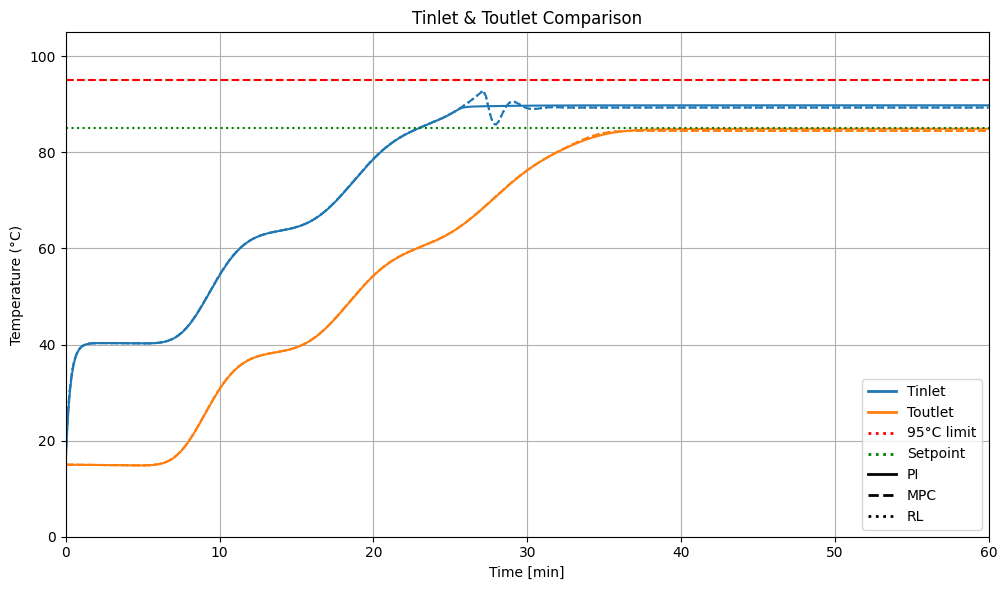

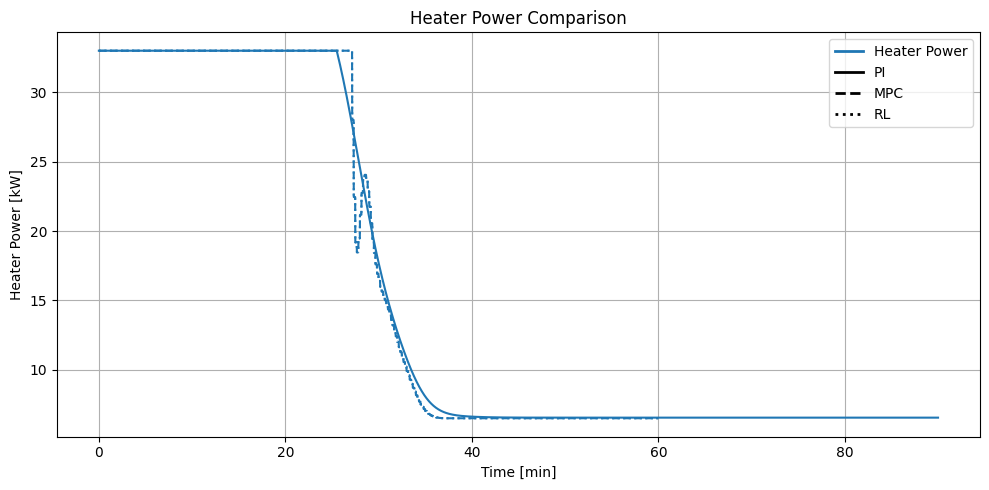

In [4]:
plot_comparison()